In [8]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를위해 mapplotlib,seaborn 를 불러온다
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# 한글설정 & 마이너스표시
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [11]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# plt.rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] =False


In [12]:
# 데이터 불러오기
# track_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/트랙정보.csv', encoding='cp949')
# track_point = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/트랙포인트정보1.csv', encoding='cp949')

In [15]:
# 데이터 불러오기
track_info = pd.read_csv('트랙정보.csv',encoding='cp949')
track_point = pd.read_csv('트랙포인트정보1.csv', encoding='cp949')

In [16]:
track_info  # 트랙정보

,TRK_IDNO,TRK_NM,TRK_SNNM,TRK_LNGTH,TRK_CTPRV_NM,TRK_EMNDN_NM,TRK_LTNO,TRK_ARA_NM,TRK_RQRMN_TM,TRK_RST_TM,...,DATA_STCD,DATA_RGSTN_DTM,DATA_UPDT_DTM,DATA_CONNO,OPERT_TPCD,OCCRR_DTM,CNTCT_BGN_DTM,CNTCT_PRCES_DTM,CNTCT_PRCES_STCD,TRNSA_ID
0,20193338814,구기계곡~우이신설도시철도 차량기지_코스,구기계곡~우이신설도시철도 차량기지_코스,9371.0,경상북도,구미시 선주원남동,NaN,tbcmanager,40001,0,...,ACCEPT,2019-09-25 14:15:54,2019-12-23 13:22:53,45031,I,20190925141554000,20191223012215,20191223012253,S,trk_tx_191223132215004002
1,20193629208,얼음골~낙가산_코스,얼음골~낙가산_코스,4898.0,광주광역시,북구 두암1동,NaN,tbcmanager,20703,0,...,ACCEPT,2019-09-26 17:40:16,2019-12-23 14:23:53,156284,I,20190926174016000,20191223022215,20191223022353,S,trk_tx_191223142215002000
2,20193763204,동신과학고등학교~녹사래골_코스,동신과학고등학교~녹사래골_코스,1905.0,대구광역시,달서구 진천동,NaN,tbcmanager,4904,0,...,ACCEPT,2019-09-27 03:13:55,2019-12-23 15:23:39,197627,I,20190927031355000,20191223032215,20191223032339,S,trk_tx_191223152215003001
3,20193787827,제주키아로라리조트~고성리신양공동묘지_코스,제주키아로라리조트~고성리신양공동묘지_코스,1094.0,강원도,태백시 철암동,NaN,tbcmanager,2750,0,...,ACCEPT,2019-09-27 04:34:15,2019-12-23 15:23:39,207034,I,20190927043415000,20191223032215,20191223032339,S,trk_tx_191223152215003001
4,20193828195,효자봉~봉곡유치원_코스,효자봉~봉곡유치원_코스,7243.0,경기도,성남시 분당구 수내2동,NaN,tbcmanager,30522,0,...,ACCEPT,2019-09-27 11:53:41,2019-12-23 15:23:39,235248,I,20190927115341000,20191223032215,20191223032339,S,trk_tx_191223152215003001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20195093,신불산_20190101_041812,신불산_20190101_041812,13486.0,울산광역시,울주군 상북면,NaN,NaN,41800,20842,...,ACCEPT,2019-09-30 14:44:20,2019-12-17 17:22:27,394086,I,20190930144420000,20191217052200,20191217052227,S,trk_tx_191217172200002000
96,20192062,마니산_20190101_054129,마니산_20190101_054129,5606.0,인천광역시,강화군 화도면,NaN,NaN,23144,3137,...,ACCEPT,2019-09-30 14:44:24,2019-12-17 17:22:27,394094,I,20190930144424000,20191217052200,20191217052227,S,trk_tx_191217172200002000
97,20191058,2호근린공원도청이전-검무산_20190101_070650,2호근린공원도청이전-검무산_20190101_070650,4303.0,경상북도,예천군 호명면,NaN,NaN,10021,308,...,ACCEPT,2019-09-30 14:44:26,2019-12-17 17:22:27,394096,I,20190930144426000,20191217052200,20191217052227,S,trk_tx_191217172200002000
98,20196109,경상북도구미시_20190101_052232,경상북도구미시_20190101_052232,696.0,경상북도,구미시 선주원남동,NaN,NaN,23345,1746,...,ACCEPT,2019-09-30 14:44:30,2019-12-17 17:22:27,394105,I,20190930144430000,20191217052200,20191217052227,S,trk_tx_191217172200002000


In [17]:
track_point  # 트랙포인트정보1

,TRK_PNT_IDNO,TRK_PNT_TABLE_NO,PRNTS_TRK_IDNO,TRK_PNT_SRTNG_ORDR,TRK_PNT_LNGTD,TRK_PNT_LTTD,TRK_PNT_HASLV,TRK_PNT_XCRD,TRK_PNT_YCRD,TRK_PNT_RCRD_DTM,DATA_STCD,DATA_RGSTN_DTM,DATA_UPDT_DTM,DATA_CONNO,OPERT_TPCD,OCCRR_DTM,CNTCT_BGN_DTM,CNTCT_PRCES_DTM,CNTCT_PRCES_STCD,TRNSA_ID
0,27038670,1,20193338814,14,128.315406,36.113676,89.51,1073385.75,1791049.67,2019-08-28 17:59:55,ACCEPT,2019-09-25 14:15:54,2019-10-11 15:15:29,27038528,I,20190925141554000,NaN,NaN,NaN,NaN
1,27038680,1,20193338814,24,128.315595,36.114370,111.39,1073402.12,1791126.79,2019-08-28 18:01:40,ACCEPT,2019-09-25 14:15:54,2019-10-11 15:15:29,27038538,I,20190925141554000,NaN,NaN,NaN,NaN
2,27038690,1,20193338814,34,128.316141,36.115085,96.61,1073450.59,1791206.51,2019-08-28 18:03:00,ACCEPT,2019-09-25 14:15:54,2019-10-11 15:15:29,27038548,I,20190925141554000,NaN,NaN,NaN,NaN
3,27038700,1,20193338814,44,128.316721,36.115867,114.50,1073502.06,1791293.69,2019-08-28 18:04:11,ACCEPT,2019-09-25 14:15:54,2019-10-11 15:15:29,27038558,I,20190925141554000,NaN,NaN,NaN,NaN
4,27038730,1,20193338814,60,128.318281,36.116787,118.19,1073641.60,1791396.92,2019-08-28 18:06:17,ACCEPT,2019-09-25 14:15:54,2019-10-11 15:15:29,27038588,I,20190925141554000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49262,183961139,1,20194085,285,37.669293,127.285899,279.91,0.00,0.00,2019-01-01 09:29:55,ACCEPT,2019-09-30 14:44:30,2019-09-30 14:44:30,183960997,I,20190930144430000,NaN,NaN,NaN,NaN
49263,183961179,1,20194085,292,37.668803,127.286382,260.73,0.00,0.00,2019-01-01 09:31:13,ACCEPT,2019-09-30 14:44:30,2019-09-30 14:44:30,183961036,I,20190930144430000,NaN,NaN,NaN,NaN
49264,183961189,1,20194085,294,37.668645,127.286501,255.81,0.00,0.00,2019-01-01 09:31:34,ACCEPT,2019-09-30 14:44:30,2019-09-30 14:44:30,183961047,I,20190930144430000,NaN,NaN,NaN,NaN
49265,183961389,1,20194085,317,37.667318,127.288660,215.65,0.00,0.00,2019-01-01 09:35:57,ACCEPT,2019-09-30 14:44:31,2019-09-30 14:44:31,183961247,I,20190930144431000,NaN,NaN,NaN,NaN


In [18]:
track_info['TRK_IDNO'], track_point['PRNTS_TRK_IDNO']

(0     20193338814
 1     20193629208
 2     20193763204
 3     20193787827
 4     20193828195
          ...     
 95       20195093
 96       20192062
 97       20191058
 98       20196109
 99       20194085
 Name: TRK_IDNO, Length: 100, dtype: int64,
 0        20193338814
 1        20193338814
 2        20193338814
 3        20193338814
 4        20193338814
             ...     
 49262       20194085
 49263       20194085
 49264       20194085
 49265       20194085
 49266       20194085
 Name: PRNTS_TRK_IDNO, Length: 49267, dtype: int64)

In [19]:
# 데이터 합치기
df = pd.merge(track_point, track_info, left_on = 'PRNTS_TRK_IDNO', right_on = 'TRK_IDNO', how = 'inner')
df.shape

(49267, 52)

In [20]:
df

,TRK_PNT_IDNO,TRK_PNT_TABLE_NO,PRNTS_TRK_IDNO,TRK_PNT_SRTNG_ORDR,TRK_PNT_LNGTD,TRK_PNT_LTTD,TRK_PNT_HASLV,TRK_PNT_XCRD,TRK_PNT_YCRD,TRK_PNT_RCRD_DTM,...,DATA_STCD_y,DATA_RGSTN_DTM_y,DATA_UPDT_DTM_y,DATA_CONNO_y,OPERT_TPCD_y,OCCRR_DTM_y,CNTCT_BGN_DTM_y,CNTCT_PRCES_DTM_y,CNTCT_PRCES_STCD_y,TRNSA_ID_y
0,27038670,1,20193338814,14,128.315406,36.113676,89.51,1073385.75,1791049.67,2019-08-28 17:59:55,...,ACCEPT,2019-09-25 14:15:54,2019-12-23 13:22:53,45031,I,20190925141554000,20191223012215,20191223012253,S,trk_tx_191223132215004002
1,27038680,1,20193338814,24,128.315595,36.114370,111.39,1073402.12,1791126.79,2019-08-28 18:01:40,...,ACCEPT,2019-09-25 14:15:54,2019-12-23 13:22:53,45031,I,20190925141554000,20191223012215,20191223012253,S,trk_tx_191223132215004002
2,27038690,1,20193338814,34,128.316141,36.115085,96.61,1073450.59,1791206.51,2019-08-28 18:03:00,...,ACCEPT,2019-09-25 14:15:54,2019-12-23 13:22:53,45031,I,20190925141554000,20191223012215,20191223012253,S,trk_tx_191223132215004002
3,27038700,1,20193338814,44,128.316721,36.115867,114.50,1073502.06,1791293.69,2019-08-28 18:04:11,...,ACCEPT,2019-09-25 14:15:54,2019-12-23 13:22:53,45031,I,20190925141554000,20191223012215,20191223012253,S,trk_tx_191223132215004002
4,27038730,1,20193338814,60,128.318281,36.116787,118.19,1073641.60,1791396.92,2019-08-28 18:06:17,...,ACCEPT,2019-09-25 14:15:54,2019-12-23 13:22:53,45031,I,20190925141554000,20191223012215,20191223012253,S,trk_tx_191223132215004002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49262,183961139,1,20194085,285,37.669293,127.285899,279.91,0.00,0.00,2019-01-01 09:29:55,...,ACCEPT,2019-09-30 14:44:29,2019-12-17 17:22:27,394102,I,20190930144429000,20191217052200,20191217052227,S,trk_tx_191217172200002000
49263,183961179,1,20194085,292,37.668803,127.286382,260.73,0.00,0.00,2019-01-01 09:31:13,...,ACCEPT,2019-09-30 14:44:29,2019-12-17 17:22:27,394102,I,20190930144429000,20191217052200,20191217052227,S,trk_tx_191217172200002000
49264,183961189,1,20194085,294,37.668645,127.286501,255.81,0.00,0.00,2019-01-01 09:31:34,...,ACCEPT,2019-09-30 14:44:29,2019-12-17 17:22:27,394102,I,20190930144429000,20191217052200,20191217052227,S,trk_tx_191217172200002000
49265,183961389,1,20194085,317,37.667318,127.288660,215.65,0.00,0.00,2019-01-01 09:35:57,...,ACCEPT,2019-09-30 14:44:29,2019-12-17 17:22:27,394102,I,20190930144429000,20191217052200,20191217052227,S,trk_tx_191217172200002000


In [21]:
# 결측치 확인
df.isnull().sum()

TRK_PNT_IDNO              0
TRK_PNT_TABLE_NO          0
PRNTS_TRK_IDNO            0
TRK_PNT_SRTNG_ORDR        0
TRK_PNT_LNGTD             0
TRK_PNT_LTTD              0
TRK_PNT_HASLV             0
TRK_PNT_XCRD              0
TRK_PNT_YCRD              0
TRK_PNT_RCRD_DTM          0
DATA_STCD_x               0
DATA_RGSTN_DTM_x          0
DATA_UPDT_DTM_x           0
DATA_CONNO_x              0
OPERT_TPCD_x              0
OCCRR_DTM_x               0
CNTCT_BGN_DTM_x       49267
CNTCT_PRCES_DTM_x     49267
CNTCT_PRCES_STCD_x    49267
TRNSA_ID_x            49267
TRK_IDNO                  0
TRK_NM                    0
TRK_SNNM                  0
TRK_LNGTH                 0
TRK_CTPRV_NM              0
TRK_EMNDN_NM              0
TRK_LTNO              49267
TRK_ARA_NM            45123
TRK_RQRMN_TM              0
TRK_RST_TM                0
TRK_SPRT_ITE_IDNO         0
TRK_BGN_LCTN_LNGTD        0
TRK_BGN_LCTN_LTTD         0
TRK_END_LCTN_LNGTD        0
TRK_END_LCTN_LTTD         0
TRK_AVRG_GRDNT      

In [22]:
# 결측치, 중복 컬럼 제거
df = df.drop(columns=['CNTCT_BGN_DTM_x', 'CNTCT_PRCES_DTM_x', 'CNTCT_PRCES_STCD_x', 'TRNSA_ID_x', 'TRK_LTNO',
                      'TRK_ARA_NM', 'DATA_STCD_y', 'DATA_RGSTN_DTM_y', 'DATA_UPDT_DTM_y', 'DATA_CONNO_y', 'OPERT_TPCD_y', 'OCCRR_DTM_y'])
df.shape

(49267, 40)

In [23]:
# 컬럼명 변경
col_names = ['트랙포인트고유번호', '트랙포인트테이블번호', '부모트랙고유번호', '트랙포인트정렬순서', '트랙포인트경도', '트랙포인트위도',
             '트랙포인트해발고도', '트랙포인트X좌표', '트랙포인트Y좌표', '트랙포인트기록일시', '데이터상태코드', '데이터등록일시',
             '데이터수정일시', '데이터일련번호', '작업구분코드', '발생일시', '트랙고유번호', '트랙명', '트랙이명', '트랙길이',
             '트랙시도명', '트랙읍면동명', '트랙소요시간', '트랙휴식시간', '트랙운동종목고유번호', '트랙시작위치경도', '트랙시작위치위도',
             '트랙종료위치경도', '트랙종료위치위도', '트랙평균경사도', '트랙최고해발고도', '트랙최저해발고도', '트랙오름길이',
             '트랙평지길이', '트랙내림길이', '트랙난이도값', '연계시작일시', '연계처리일시', '연계처리상태코드', '트랜젝션ID']
# col_names

In [24]:
df.columns = col_names

In [25]:
# 필요없는 컬럼 제거
df = df.drop(columns=['트랙포인트테이블번호', '부모트랙고유번호', '트랙포인트정렬순서', '트랙포인트기록일시', '데이터상태코드',
                      '데이터등록일시', '데이터수정일시', '데이터일련번호', '작업구분코드', '발생일시', '트랙운동종목고유번호',
                      '연계시작일시', '연계처리일시', '연계처리상태코드', '트랜젝션ID'])
df.columns

Index(['트랙포인트고유번호', '트랙포인트경도', '트랙포인트위도', '트랙포인트해발고도', '트랙포인트X좌표', '트랙포인트Y좌표',
       '트랙고유번호', '트랙명', '트랙이명', '트랙길이', '트랙시도명', '트랙읍면동명', '트랙소요시간', '트랙휴식시간',
       '트랙시작위치경도', '트랙시작위치위도', '트랙종료위치경도', '트랙종료위치위도', '트랙평균경사도', '트랙최고해발고도',
       '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이', '트랙난이도값'],
      dtype='object')

In [26]:
df['트랙난이도값'].isnull().sum()

0

In [27]:
df['트랙난이도값'].value_counts()

트랙난이도값
0    49267
Name: count, dtype: int64

In [28]:
df = df.drop(columns=['트랙난이도값'])
df.columns

Index(['트랙포인트고유번호', '트랙포인트경도', '트랙포인트위도', '트랙포인트해발고도', '트랙포인트X좌표', '트랙포인트Y좌표',
       '트랙고유번호', '트랙명', '트랙이명', '트랙길이', '트랙시도명', '트랙읍면동명', '트랙소요시간', '트랙휴식시간',
       '트랙시작위치경도', '트랙시작위치위도', '트랙종료위치경도', '트랙종료위치위도', '트랙평균경사도', '트랙최고해발고도',
       '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이'],
      dtype='object')

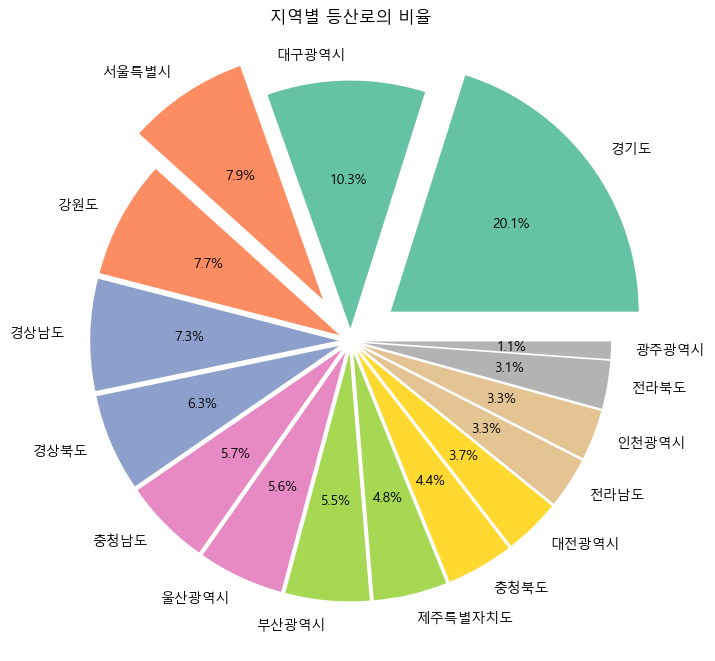

In [29]:
plt.figure(figsize=(8,10))
explode = [0.2 if region in ['서울특별시', '경기도'] else 0.05 for region in df['트랙시도명'].value_counts().index]
df['트랙시도명'].value_counts().plot.pie(cmap='Set2',
                                         autopct='%.1f%%',
                                         explode=explode)
plt.title('지역별 등산로의 비율')
plt.ylabel('')
plt.savefig('지역별_등산로의_비율.png')
# plt.show()


In [30]:
df['트랙소요시간']

0        40001
1        40001
2        40001
3        40001
4        40001
         ...  
49262    15509
49263    15509
49264    15509
49265    15509
49266    15509
Name: 트랙소요시간, Length: 49267, dtype: int64

Text(0, 0.5, '소요시간(분)')

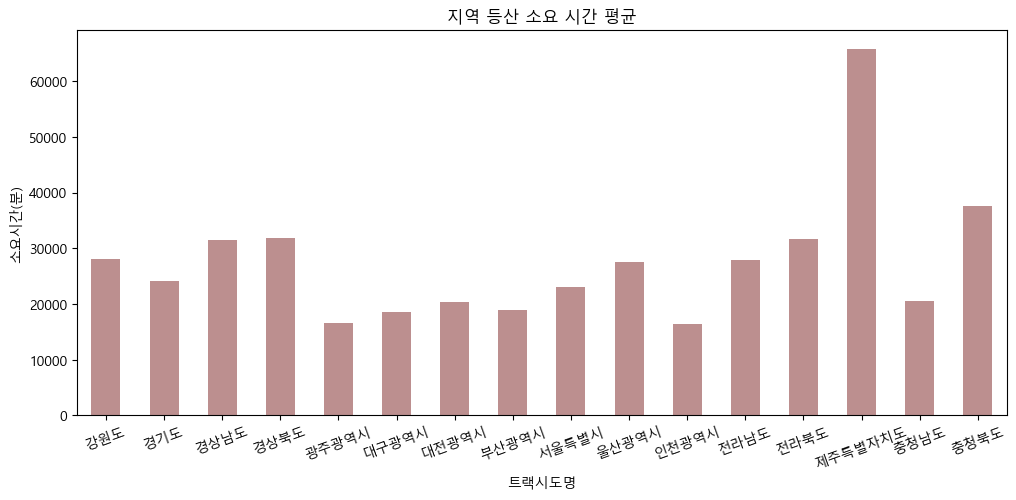

In [31]:
plt.figure(figsize=(12,5))
c_avg = df.groupby('트랙시도명')['트랙소요시간'].mean()
c_avg.plot.bar(rot=20, color='rosybrown')
plt.title('지역 등산 소요 시간 평균')
plt.ylabel('소요시간(분)')

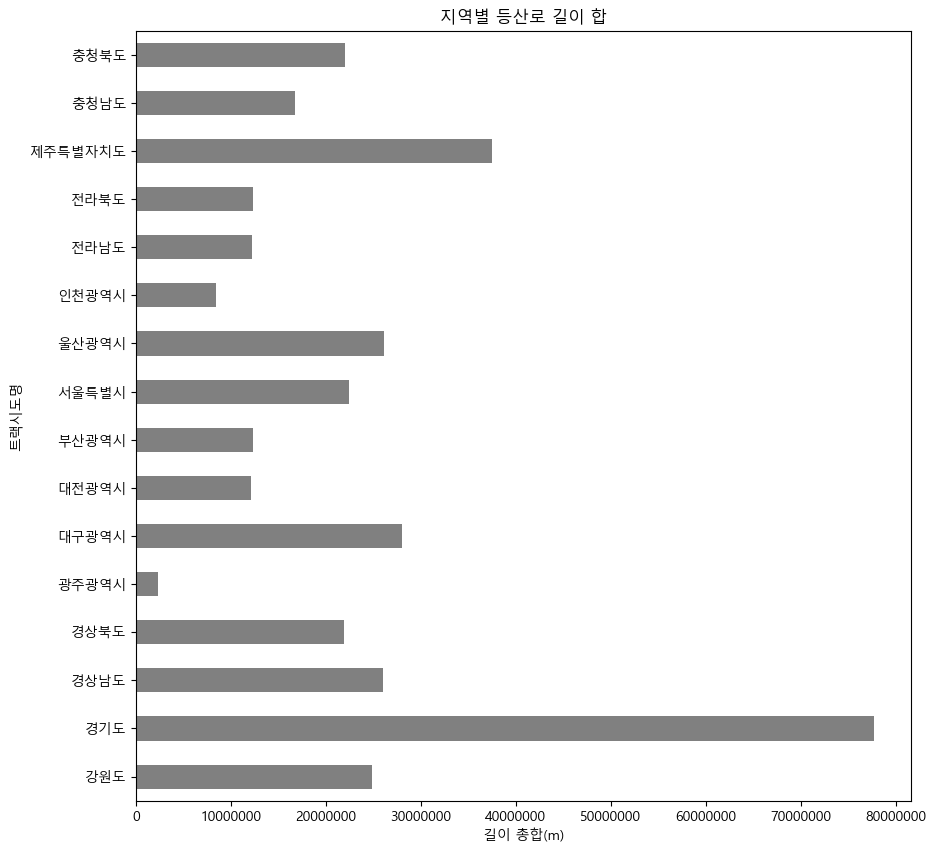

In [32]:
plt.figure(figsize=(10,10))
t_sum = df.groupby('트랙시도명')['트랙길이'].sum()
t_sum.plot.barh(color='grey')
plt.title('지역별 등산로 길이 합')

# x축의 표시 형식을 변경하여 지수 표기법을 사용하지 않도록 설정
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('길이 총합(m)')

plt.show()

In [33]:
df.loc[df['트랙시도명'] == '제주특별자치도', '트랙평균경사도'].max()

14.25

In [35]:
avg_of_all = df['트랙길이'].mean()
avg_of_all

7366.730184504841

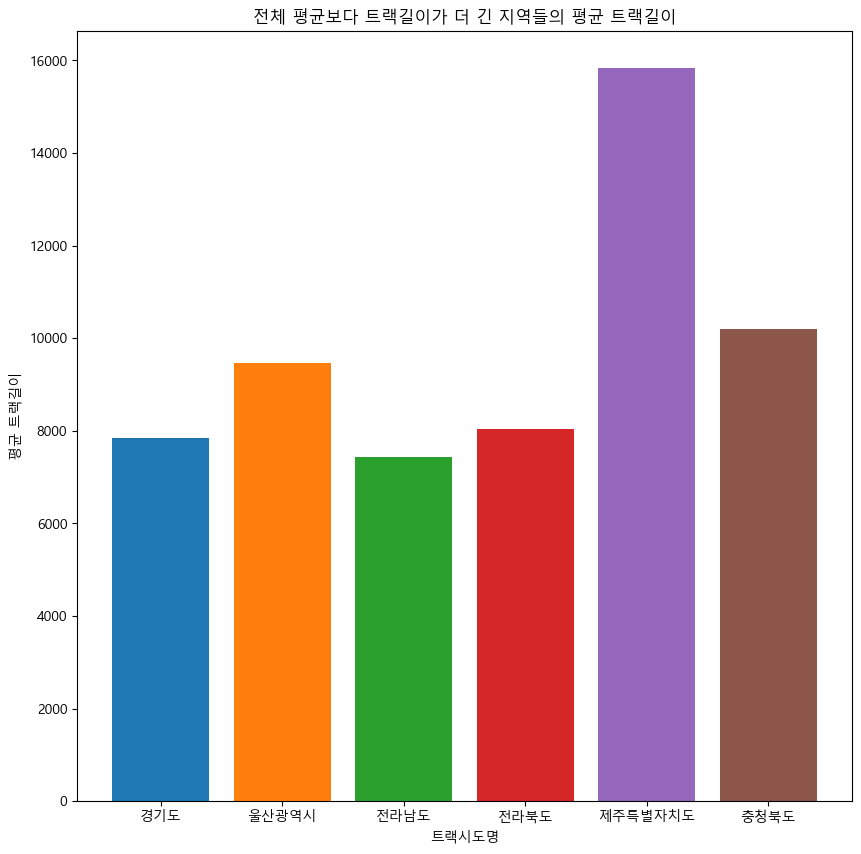

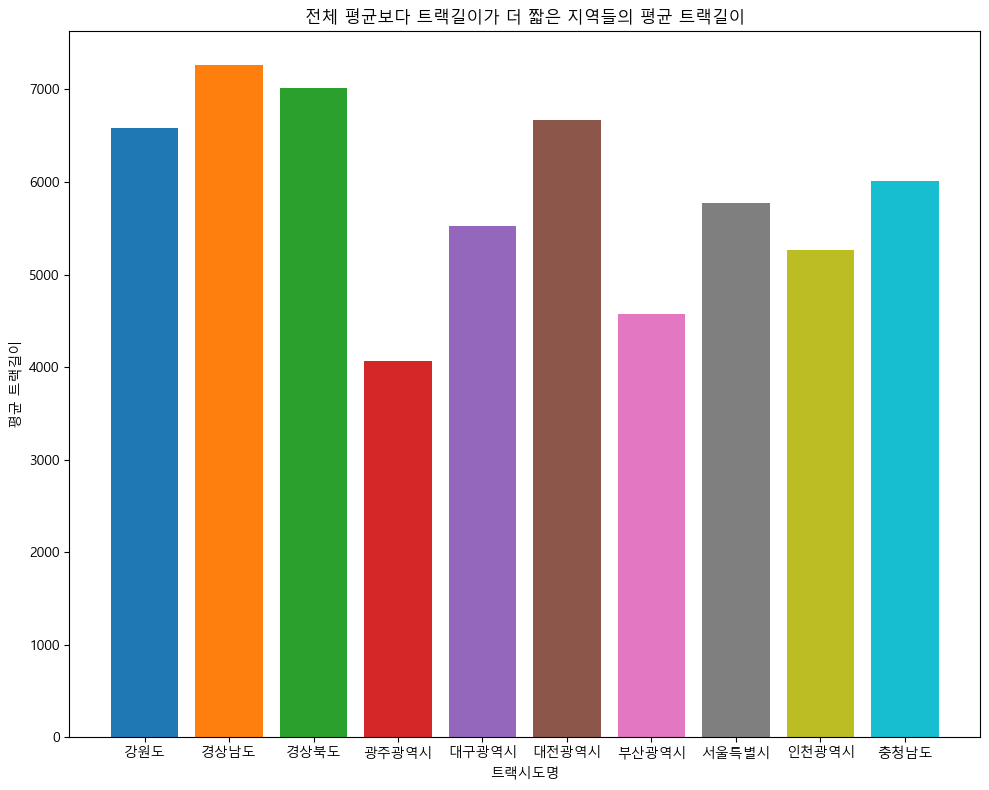

In [36]:
plt.figure(figsize=(10, 10))

# 첫 번째 서브플롯
# plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 위치
avg_by_group = df.groupby('트랙시도명')['트랙길이'].mean()
larger_than_avg = avg_by_group > avg_of_all

for group_name, is_larger in larger_than_avg.items():
    if is_larger:
        group_data = df[df['트랙시도명'] == group_name]
        plt.bar(group_name, group_data['트랙길이'].mean())

plt.title('전체 평균보다 트랙길이가 더 긴 지역들의 평균 트랙길이')
plt.xlabel('트랙시도명')
plt.ylabel('평균 트랙길이')
# plt.show()

# 두 번째 서브플롯
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 위치
avg_of_all = df['트랙길이'].mean()
avg_by_group = df.groupby('트랙시도명')['트랙길이'].mean()
shorter_than_avg = avg_by_group < avg_of_all

for group_name, is_shorter in shorter_than_avg.items():
    if is_shorter:
        group_data = df[df['트랙시도명'] == group_name]
        plt.bar(group_name, group_data['트랙길이'].mean())

plt.title('전체 평균보다 트랙길이가 더 짧은 지역들의 평균 트랙길이')
plt.xlabel('트랙시도명')
plt.ylabel('평균 트랙길이')

plt.tight_layout()
# plt.show()
# plt.savefig('경사도_평균2.png')

In [37]:
df['트랙평균경사도']

0        11.25
1        11.25
2        11.25
3        11.25
4        11.25
         ...  
49262    13.89
49263    13.89
49264    13.89
49265    13.89
49266    13.89
Name: 트랙평균경사도, Length: 49267, dtype: float64

Text(0, 0.5, '빈도 수')

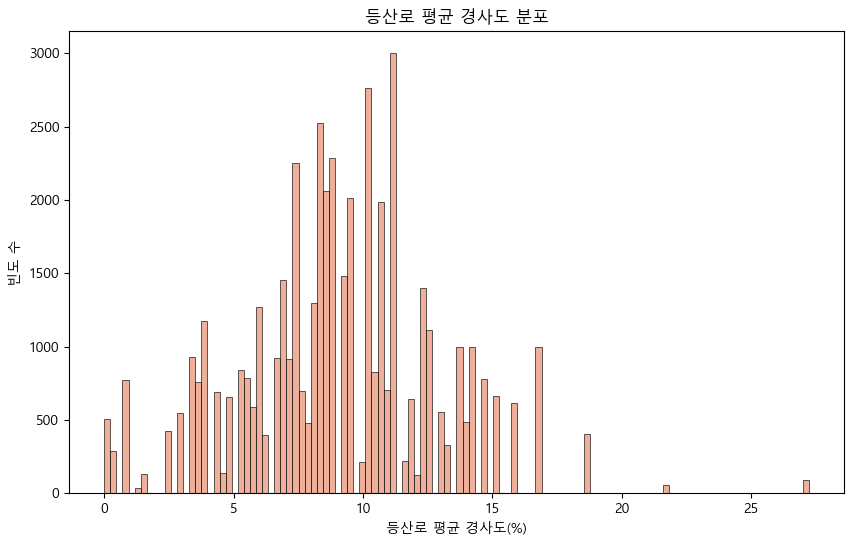

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['트랙평균경사도'], color='darksalmon')
plt.title('등산로 평균 경사도 분포')
plt.xlabel('등산로 평균 경사도(%)')
plt.ylabel('빈도 수')
# plt.savefig('등산로_평균_경사도_분포.png')

<Axes: xlabel='트랙시도명', ylabel='트랙평균경사도'>

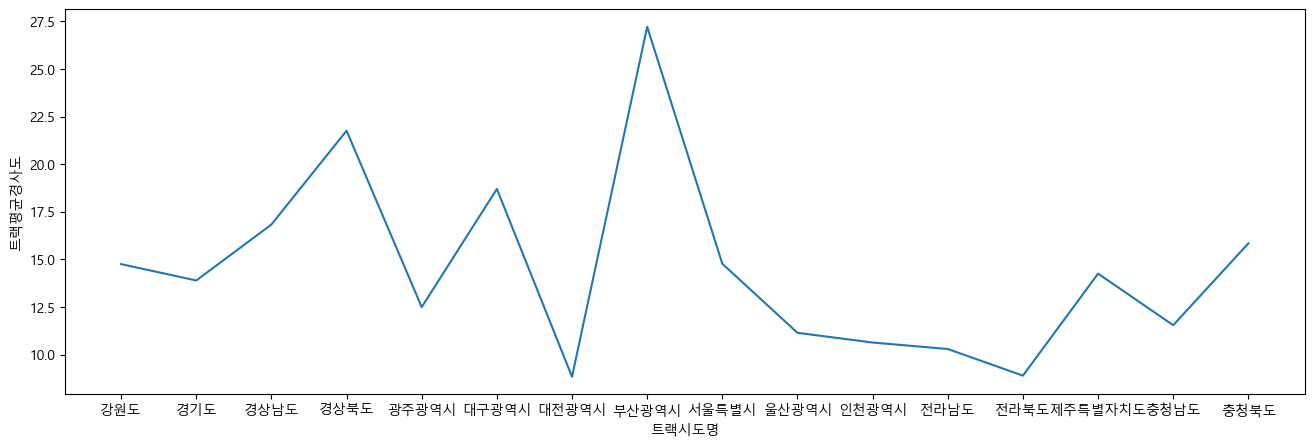

In [39]:
max_slope = df.groupby('트랙시도명')['트랙평균경사도'].max()
plt.figure(figsize=(16,5))
sns.lineplot(max_slope)

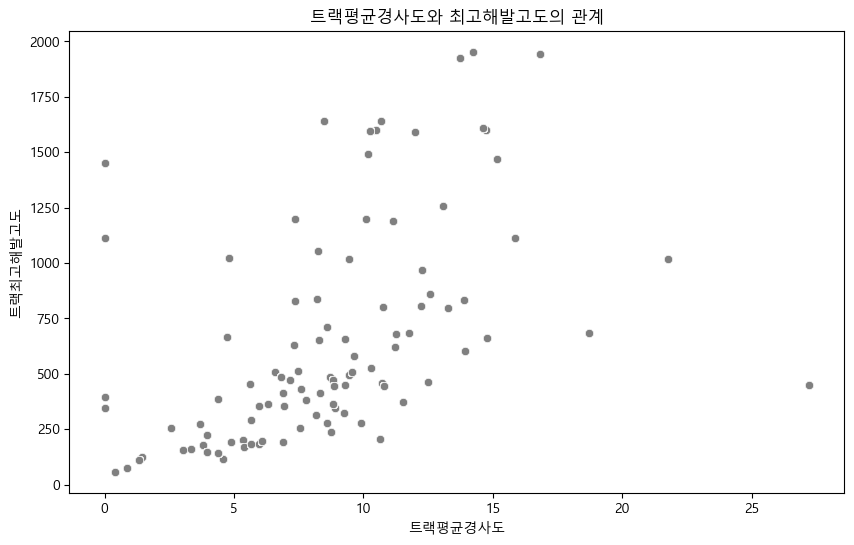

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙평균경사도', y='트랙최고해발고도', color='grey')
plt.title('트랙평균경사도와 최고해발고도의 관계')
plt.xlabel('트랙평균경사도')
plt.ylabel('트랙최고해발고도')
plt.show()

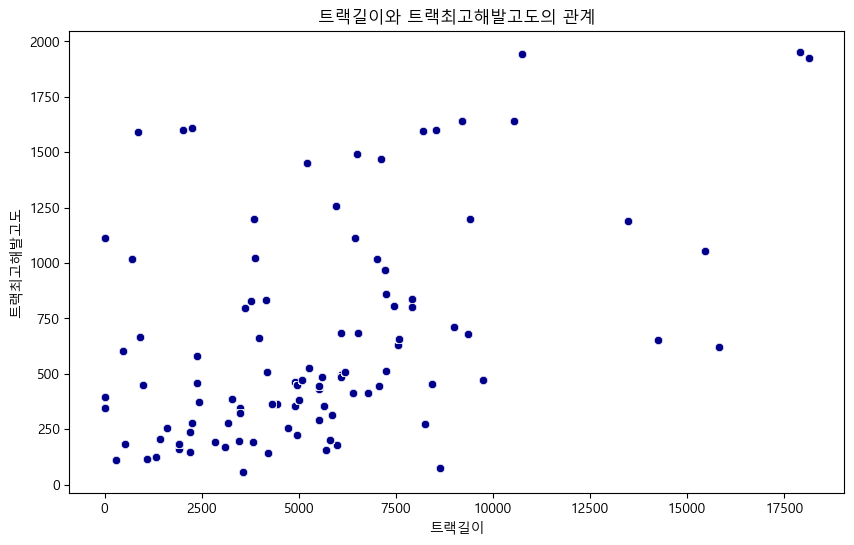

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙길이', y='트랙최고해발고도', color='darkblue')
plt.title('트랙길이와 트랙최고해발고도의 관계')
plt.xlabel('트랙길이')
plt.ylabel('트랙최고해발고도')
plt.show()

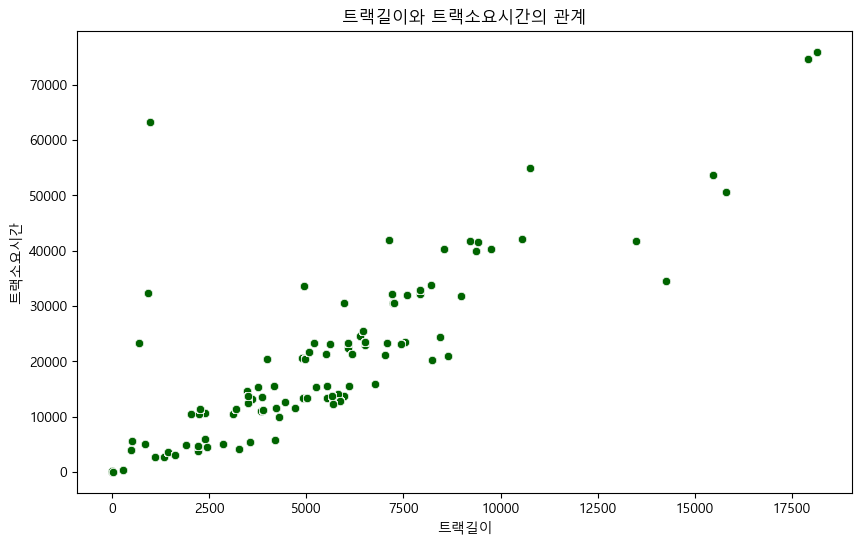

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙길이', y='트랙소요시간', color='darkgreen')
plt.title('트랙길이와 트랙소요시간의 관계')
plt.xlabel('트랙길이')
plt.ylabel('트랙소요시간')
plt.show()

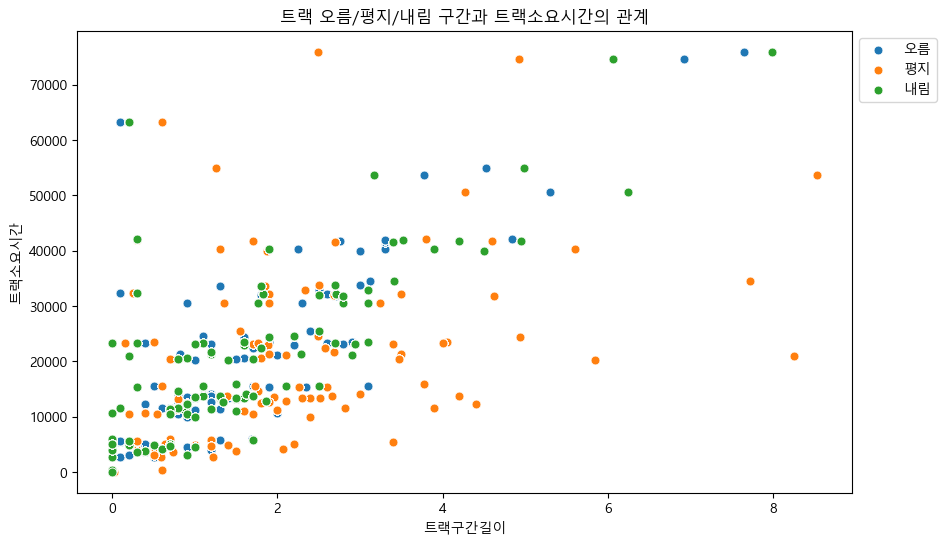

In [43]:
'트랙오름길이', '트랙평지길이', '트랙내림길이'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='트랙오름길이', y='트랙소요시간', label='오름', s=40)
sns.scatterplot(data=df, x='트랙평지길이', y='트랙소요시간', label='평지', s=40)
sns.scatterplot(data=df, x='트랙내림길이', y='트랙소요시간', label='내림', s=40)
plt.title('트랙 오름/평지/내림 구간과 트랙소요시간의 관계')
plt.xlabel('트랙구간길이')
plt.ylabel('트랙소요시간')
plt.legend(bbox_to_anchor=(1,1),loc=0 )
# plt.show()
# plt.savefig('코스_구간과_등산_소요시간.png')

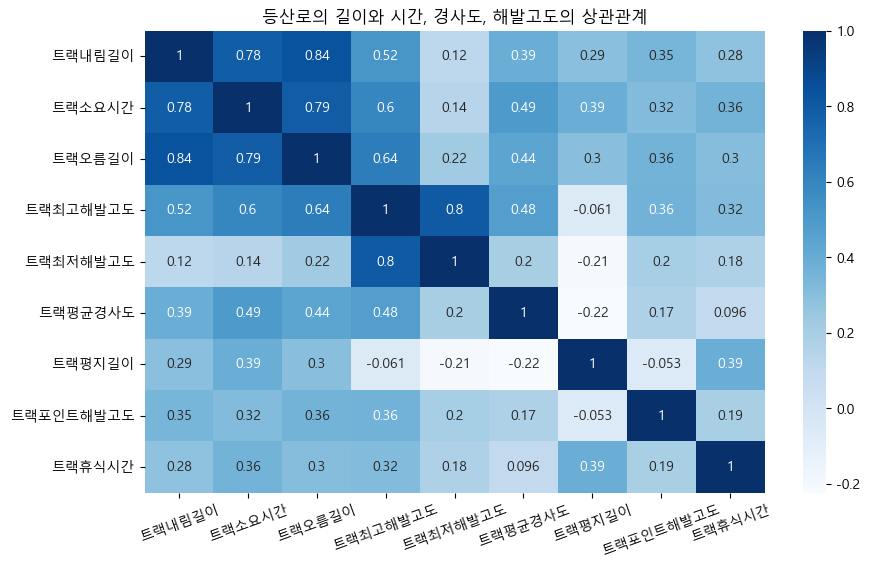

In [44]:
plt.figure(figsize=(10, 6))

# 숫자형 열만 선택
numeric_columns = ['트랙포인트해발고도','트랙길이', '트랙소요시간', '트랙휴식시간', '트랙평균경사도', '트랙최고해발고도', '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이']
h_df_numeric = df[numeric_columns]

# 집계 연산을 수행
h_df_mean = pd.pivot_table(data=h_df_numeric, index='트랙길이')
sns.heatmap(data=h_df_mean.corr(), cmap='Blues', annot=True)

plt.xticks(rotation=20)

plt.title('등산로의 길이와 시간, 경사도, 해발고도의 상관관계')
plt.savefig('등산로의_길이와_시간_경사도_해발고도의_상관관계.png')

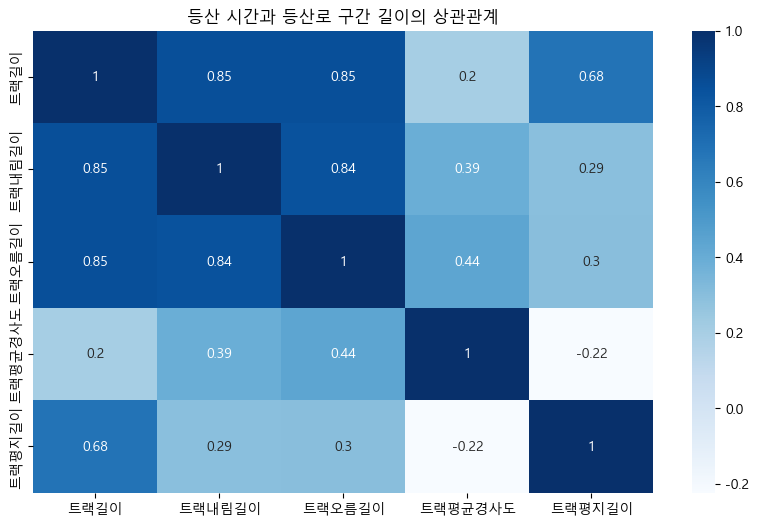

In [45]:
plt.figure(figsize=(10, 6))

# 숫자형 열만 선택
len_columns = ['트랙소요시간', '트랙길이', '트랙오름길이', '트랙평지길이', '트랙내림길이', '트랙평균경사도']
df_len = df[len_columns]

# 집계 연산을 수행
df_mean = pd.pivot_table(data=df_len, index='트랙소요시간')
sns.heatmap(data=df_mean.corr(), cmap='Blues', annot=True)

# plt.xticks(rotation=20)

plt.title('등산 시간과 등산로 구간 길이의 상관관계')
plt.savefig('등산_시간과_등산로_구간_길이의_상관관계.png')

D:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


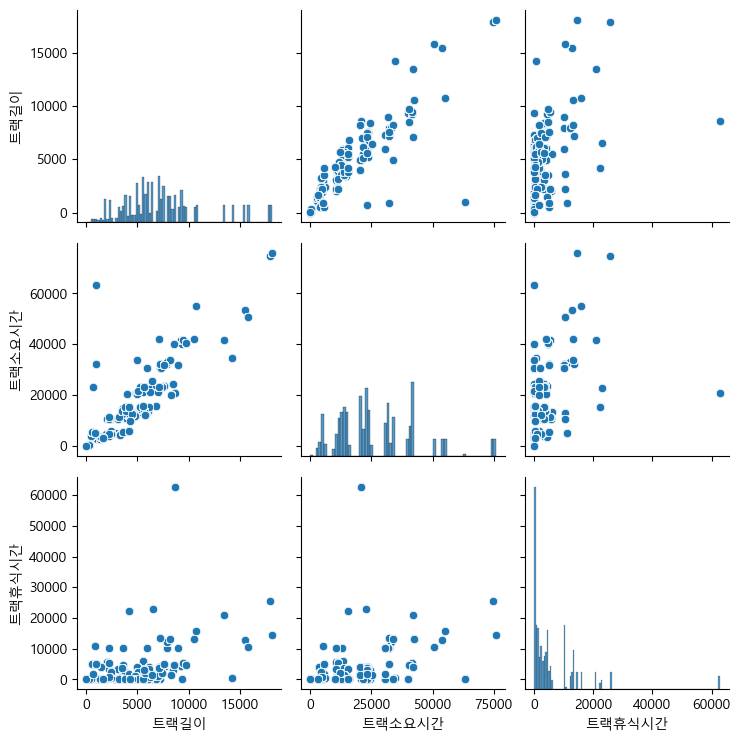

In [46]:
sns.pairplot(df[['트랙길이', '트랙소요시간', '트랙휴식시간']])
plt.subplots_adjust(hspace=.1)
# plt.title('코스 길이와 등산시간의 상관관계')
# plt.savefig('코스_길이와_등산시간의_상관관계.png')

In [47]:
df.columns

Index(['트랙포인트고유번호', '트랙포인트경도', '트랙포인트위도', '트랙포인트해발고도', '트랙포인트X좌표', '트랙포인트Y좌표',
       '트랙고유번호', '트랙명', '트랙이명', '트랙길이', '트랙시도명', '트랙읍면동명', '트랙소요시간', '트랙휴식시간',
       '트랙시작위치경도', '트랙시작위치위도', '트랙종료위치경도', '트랙종료위치위도', '트랙평균경사도', '트랙최고해발고도',
       '트랙최저해발고도', '트랙오름길이', '트랙평지길이', '트랙내림길이'],
      dtype='object')

In [48]:
df['트랙시작위치위도'].value_counts()

트랙시작위치위도
36.113503    1000
35.555748    1000
33.421886    1000
37.313091    1000
35.303898    1000
             ... 
36.145390      52
37.327293      33
37.476757       3
35.970577       2
35.715485       2
Name: count, Length: 100, dtype: int64

Text(0, 0.5, '높이 차 빈도 수')

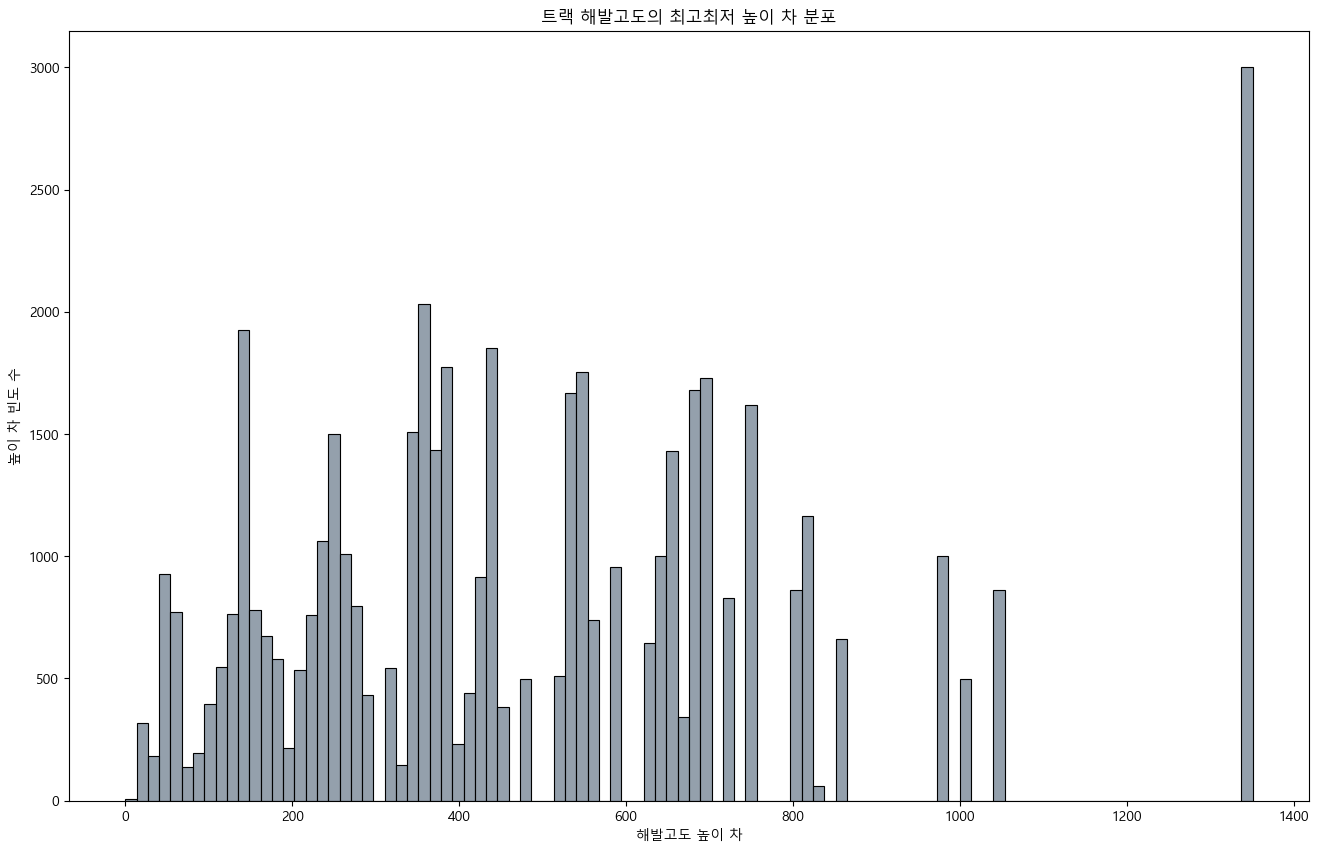

In [49]:
plt.figure(figsize=(16,10))
fall = df['트랙최고해발고도'] - df['트랙최저해발고도']
sns.histplot(data=fall, color='slategrey', bins=100)
plt.title('트랙 해발고도의 최고최저 높이 차 분포')
plt.xlabel('해발고도 높이 차')
plt.ylabel('높이 차 빈도 수')

Text(0, 0.5, '등산로 길이(m)')

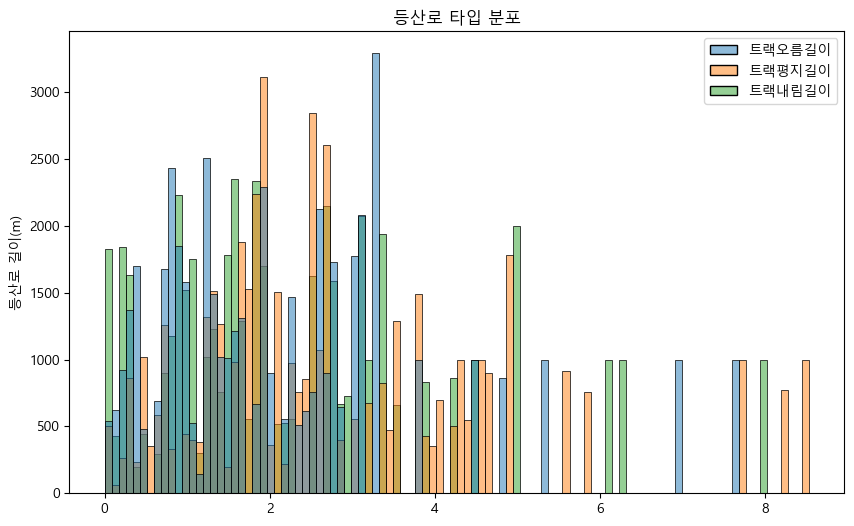

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[['트랙오름길이', '트랙평지길이', '트랙내림길이']], bins=100)
plt.title('등산로 타입 분포')
plt.ylabel('등산로 길이(m)')
# plt.savefig('등산로_타입_분포.png')

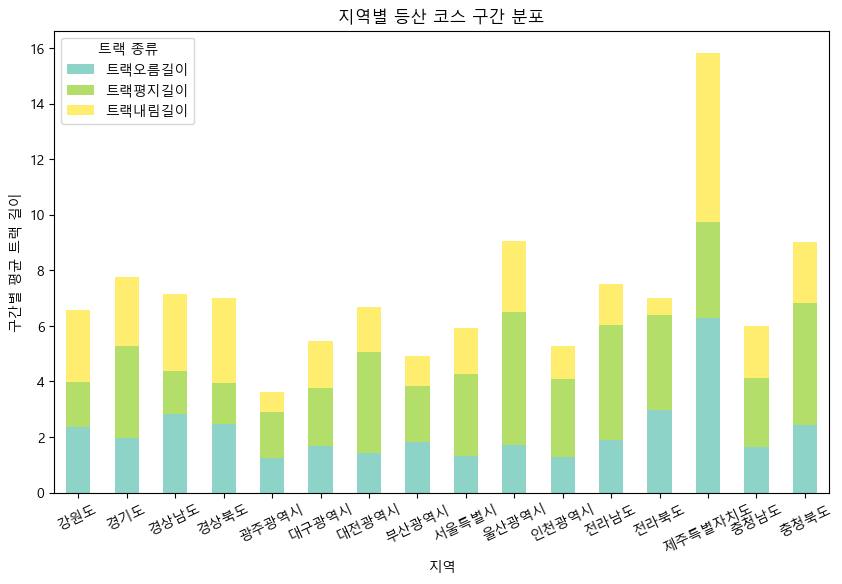

In [51]:
grouped_df = df.groupby('트랙시도명')[['트랙오름길이', '트랙평지길이', '트랙내림길이']].mean()

grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('지역별 등산 코스 구간 분포')
plt.xlabel('지역')
plt.ylabel('구간별 평균 트랙 길이')
plt.xticks(rotation=25)
plt.legend(title='트랙 종류')
plt.savefig('지역별_등산_코스_구간_분포.png')

In [52]:
m = folium.Map(location=[37.5519, 126.9918], zoomstart=15)

# 시도별로 다른 색으로 마커를 표시
colors = ['red', 'blue', 'green', 'orange', 'purple', 'darkred', 'darkblue', 'darkgreen', 'cadetblue', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray', 'cadetblue']
color_dict = dict(zip(df['트랙시도명'].unique(), colors))

# 그룹별로 마커 표시
for name, group in df.groupby('트랙시도명'):
    if name in color_dict:  # color_dict에 키가 있는지 확인
        color = color_dict[name]
        for row in group.index[:len(df.index):100]:
            lat = group.loc[row, '트랙시작위치위도']
            lng = group.loc[row, '트랙시작위치경도']
            folium.Marker(location=[lat,lng], icon=folium.Icon(color=color)).add_to(m)

m